In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Make it possible to print multiple results at one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set pandas to display all columns
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 100)

# Part 1. Data Preprocessing

## 1.1 Read the Coil History File

In [2]:
coil = pd.read_csv("CoilHistory.csv")
coil.shape
coil.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,43,68,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(273980, 124)

,INVID#,INVSEQ,INTYPE,INDENS,INUOM,INUNIT,INUCLS,INMLDP,INHEAT,INVCOM,INMLD#,IN#PAS,INREDT,INOWNR,INALLY,INMAJL,INMINL,INRDEP,INRMCH,INRNUM,INVCLK,INTRST,INVCYD,INBULN,INMANU,INTEMP,INVSPI,INVCST,INVSTT,INVTWN,INSEVN,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSWID,INSGAG,INSLEN,INSLCD,INSSHF,INSDAT,INSTIM,INSGWT,INSTWT,INSLBS,INSWMC,INSSCL,INSFOT,INSPCS,INSTRN,INSTMS,INFEVN,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFWID,INFGAG,INFLEN,INFLCD,INFSHF,INFDAT,INFTIM,INFGWT,INFTWT,INFLBS,INFWMC,INFSCL,INFFOT,INFPCS,INFTRN,INFTMS,INELAP,INGLBS,INVSCR,INTFOT,INADEP,INAMCH,INANUM,INARAT,INTRTY,INVUSY,INVCSY,INVUAY,INVCAY,INVNSC,INVASC,INVBWT,ISYTMS,INVPID,INVCID,INGRAD,INMTCD,INSCSH,INFCSH,INPLST,INPLFT,INPLSD,INPLFD,INSTWL,INFNWL,INSTID,INFNID,INSTOD,INFNOD,INLSSQ,INBLCH,INBLBS,INCOSH,INTRDT,INIVDT,INIVTK,INIVWT,INLSOP,INLSUN,INRRN
0,420000,0.00,C,0.317,LBS,,,1,22889,...,,0,0,-00014.,226,JIT,044,,,,44RL,g_bufrr44x,0,,,,,0,0,0,0,13599,30,IN,044,Y,A,PRIME,NONE,38.67,0.250,0.0,C,1,20190611,74046,20674,0,20674,PLC,TORSCALE,3979,1,LOAD044,2019-06-11 07:40:46.146000,1,13599,40,AN,143,Y,A,PRIME,NONE,38.67,0.0350,0.0,C,1,20190611,84425,20485,0,20485,CALC,PROCESINFO,3979,1,044UNLOAD,2019-06-11 08:44:24.893000,63,0,0,0,,,,0.0,P,0.0,0.0,0.0,0.0,0,0,0,2019-06-11 08:44:25.065000,122889,420000,,,,,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,30,0.0,,,0,0,,0,,044,5714363
1,420000,326.50,C,0.317,LBS,,,1,22889,...,,0,0,-00014.,226,IN,147,,,,147,g_bufa147e,0,,,,,0,0,0,1,13599,40,AN,147,Y,A,PRIME,NONE,38.67,0.035,0.0,C,1,20190611,84425,20485,0,20485,CALC,PROCESINFO,3979,1,044UNLOAD,2019-06-11 08:44:24.893000,2,13599,40,IN,147,Y,A,PRIME,NONE,38.67,0.0350,0.0,C,2,20190611,201302,20485,0,20485,CALC,PROCESINFO,3979,1,LOADSTND,2019-06-11 20:13:02.019742,688,0,0,0,,,,0.0,P,0.0,0.0,0.0,0.0,0,0,0,2019-06-11 20:13:02.066619,122889,420000,,,,,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,30,0.0,,,0,0,,0,,044,5715179
2,420000,326.50,C,0.317,LBS,,,1,22889,...,,0,0,-00014.,226,JIT,147,,,,147,g_bufa147x,0,,,,,0,0,0,2,13599,40,IN,147,Y,A,PRIME,NONE,38.67,0.035,0.0,C,2,20190611,201302,20485,0,20485,CALC,PROCESINFO,3979,1,LOADSTND,2019-06-11 20:13:02.019742,3,13599,50,CR,046,Y,A,PRIME,NONE,38.67,0.0350,0.0,,2,20190611,214242,20485,0,20485,CALC,FOOTAGE,3985,1,UNLOADSTND,2019-06-11 21:42:42.162513,0,0,0,0,,,,0.0,U,0.0,0.0,0.0,0.0,0,0,0,2019-06-11 21:42:42.193765,122889,420000,,,,,0,0,0,0,0.00,2.53,0.0,20.0,0.00,25.06,40,0.0,,NaN,0,0,,0,AN,147,5715249
3,420000,612.91,C,0.317,LBS,,,1,22889,...,,0,0,-00014.,226,IN,046,,,,046,420000,0,,,,,0,0,0,3,13599,50,CR,046,Y,A,PRIME,NONE,38.67,0.035,0.0,,2,20190611,214242,20485,0,20485,CALC,FOOTAGE,3985,1,UNLOADSTND,2019-06-11 21:42:42.162513,4,13599,50,IN,046,Y,A,PRIME,NONE,38.67,0.0350,0.0,,2,20190612,174243,20485,0,20485,CALC,FOOTAGE,3985,1,LOADROLL,2019-06-12 17:42:43.189322,0,0,0,0,,,,0.0,U,0.0,0.0,0.0,0.0,0,0,0,2019-06-12 17:42:43.204945,122889,420000,,,,,0,0,0,0,2.53,2.53,20.0,20.0,25.06,25.06,40,0.0,,NaN,0,0,,0,AN,147,5716634
4,420000,0.00,C,0.317,LBS,,,1,22889,...,,2,0,-00014.,226,JIT,046,,,,046,g_bufrl46x,0,,,,,0,0,0,4,13599,50,IN,046,Y,A,PRIME,NONE,38.67,0.035,0.0,,2,20190612,174243,20485,0,20485,CALC,FOOTAGE,3985,1,LOADROLL,2019-06-12 17:42:43.189322,5,13599,60,AN,134,Y,A,PRIME,NONE,38.67,0.0163,0.0,,2,20190612,180729,18913,0,18913,CALC,PLCFOOT,7888,1,UNLOADROLL,2019-06-12 18:07:29.016738,0,0,0,0,,,,0.0,P,0.0,0.0,0.0,0.0,0,0,0,2019-06-12 18:07:29.050152,122889,420000,,,,,0,0,0,0,2.53,3.71,20.0,20.0,25.06,27.41,50,0.0,,NaN,0,0,,0,RL,046,5716682


In [3]:
# Convert `INSENT` into numeric
coil['INSENT'] = pd.to_numeric(coil['INSENT'], errors='coerce')
coil['INVID#'] = coil['INVID#'].str.strip()

In [4]:
coil_used_columns = ['INVID#', 'INSGWT', 'INFGWT', 'INELAP','INALLY',
                     # Start info
                     'INSENT', 'INSRSQ', 'INSNXO', 'INSNXU', 'INSROP',
                     'INSACT', 'INSSTA', 'INSHLD', 'INSLEN', 'INSWID',
                     'INSGAG', 'INSDAT', 'INSTIM', 'INSFOT',
                     # Finish info
                     'INFENT', 'INFRSQ', 'INFNXO', 'INFNXU', 'INFROP',
                     'INFACT', 'INFSTA', 'INFHLD', 'INFLEN', 'INFWID',
                     'INFGAG', 'INFDAT', 'INFTIM', 'INFFOT']

## 1.2 Read the Operation Detail File

In [5]:
oper = pd.read_csv("OperationsDetail.csv", low_memory=False)
oper.shape
oper.head()

(667167, 54)

,SDENT#,SDOPER,SDDEPT,SDTYPE,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDPCS1,SDPCS2,SDLC,SDWC,SDOFF#,SDSCR#,SDHRSM,SDYELD,SDPACK,SDRCCD,SDSHAP,SDWHO,SDMEMO,SDLEAD,SDOFFS,SDMOVE,SDQUET,SDBACK,SDPCSA,SDWIDT,SDGAUG,SDCLAS,SDUNIT,SDAREA,SDOPCD,SDRTAR,SDRMIN,SDRMAX,SD#PAS,SDBRSH,SDCORE,SDLSPD,SDFSPD,SDMREQ,SDBTEN,SDCOMM
0,1000,10,41,102,43,43 HOT ROLL,1.0,1.0,23723,0,0.21,0.00,20180323,20180321,C,32.500,0.635,3732.1,1,1,00,00,23723,572,0.0093,0.9765,,0,1,,RT322BA,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,,,,HR,0.635,0.00000,0.0000,0,,,0.0,0.0,,,
1,1000,20,41,51,230,TORIN MILLING,1.0,1.0,21924,0,0.30,0.00,20180323,20180321,C,32.250,0.601,3732.1,1,1,00,00,21924,1799,0.0136,0.9024,,0,1,,RT322BA,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,,,,ML,0.601,0.00000,0.0000,0,,,0.0,0.0,,,
2,1000,30,41,103,44,44 4-STAND ROLL,1.0,1.0,21802,21802,0.15,0.15,20180323,20180321,C,32.250,0.146,15033.8,1,1,00,00,21802,122,0.0064,0.8974,B,0,1,EMS,SYSTEM,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,,,,CR,0.146,0.00000,0.0000,0,,,0.0,0.0,,,
3,1000,40,41,2,143,143 STRAND ANNEAL,1.0,1.0,21802,21802,0.97,0.97,20180323,20180322,C,32.250,0.146,15033.8,1,1,00,00,21802,0,0.0262,0.8974,,0,1,EMS,SYSTEM,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,,,,AN,0.060,0.00051,0.0007,0,Y,,0.0,0.0,,,
4,1000,50,41,56,68,68 SLITTER,1.0,1.0,18286,18286,1.98,1.98,20180323,20180323,C,4.962,0.146,14119.7,1,6,06,00,18286,3516,0.1014,0.7527,,0,1,EMS,SYSTEM,0.0,0.0,0.0,0.0,B,0.0,0.0,0.0,,,,SL,0.146,0.00000,0.0000,0,,,0.0,0.0,,,


In [6]:
oper_used_columns = ['SDYELD','SDENT#', 'SDOPER', 'SDNUMB', 'SDDESC', 'SDPCS',
                     'SDPCSC', 'SDLBS', 'SDLBSC', 'SDHRS', 'SDHRSC',
                     'SDDTE', 'SDDTEA', 'SDSTAT', 'SDWDT', 'SDGAG',
                     'SDLEN', 'SDHRSM', 'SDOPCD', 'SDRTAR']

## 1.3 Merge Coil History and Operation Detail

In [7]:
merge = pd.merge(coil, oper, how='left',
                 left_on=['INSENT', 'INSRSQ'],
                 right_on=['SDENT#', 'SDOPER'])
merge=merge[coil_used_columns + oper_used_columns]
merge.shape
merge.head()

(273980, 53)

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR
0,420000,20674,20485,63,226,13599.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.67,0.250,20190611,74046,3979,13599,40,AN,143,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,84425,3979,0.8833,13599.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,64797.0,64797.0,1.38,1.38,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0205,CR,0.0350
1,420000,20485,20485,688,226,13599.0,40,AN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,84425,3979,13599,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,201302,3979,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600
2,420000,20485,20485,0,226,13599.0,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,201302,3979,13599,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,214242,3985,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600
3,420000,20485,20485,0,226,13599.0,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,214242,3985,13599,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190612,174243,3985,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162
4,420000,20485,18913,0,226,13599.0,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190612,174243,3985,13599,60,AN,134,Y,A,PRIME,NONE,0.0,38.67,0.0163,20190612,180729,7888,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162


In [15]:
# Only keep the rows where start weight and finish weight are bigger than 0
merge = merge[(merge.INSGWT > 0) & (merge.INFGWT > 0)]

# Replace all infitive value
merge.replace([np.inf, -np.inf], np.nan,inplace=True)
merge.dropna(inplace=True)

# remove invalid row where yield per step > 1
merge['YIELD_per_step'] = merge.INFGWT / merge.INSGWT
merge.drop(merge[merge['YIELD_per_step'] > 1].index, inplace = True) 

# Remove all rows with 'TIN' in INVID#
merge.drop(merge[merge['INVID#'] == 'TIN'].index, inplace = True)

merge.head()
merge.shape

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step
0,420000,20674,20485,63,226,13599.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.67,0.250,20190611,74046,3979,13599,40,AN,143,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,84425,3979,0.8833,13599.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,64797.0,64797.0,1.38,1.38,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0205,CR,0.0350,0.990858
1,420000,20485,20485,688,226,13599.0,40,AN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,84425,3979,13599,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,201302,3979,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000
2,420000,20485,20485,0,226,13599.0,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,201302,3979,13599,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,214242,3985,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000
3,420000,20485,20485,0,226,13599.0,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,214242,3985,13599,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190612,174243,3985,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,1.000000
4,420000,20485,18913,0,226,13599.0,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190612,174243,3985,13599,60,AN,134,Y,A,PRIME,NONE,0.0,38.67,0.0163,20190612,180729,7888,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,0.923261


(223677, 54)

In [16]:
# save
merge.to_csv('merge.csv', index = False)

# Part 2. Exploratory Data Analysis

In [17]:
edadata = merge[(merge.INSGWT > merge.INFGWT)] # When exploring the data, we only look at rows where weight change happens

## 2.1 Yield 
- Yield per step ranges mostly from 80% to 100%

<Figure size 432x216 with 0 Axes>

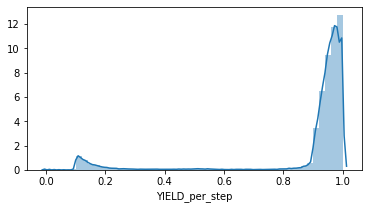

In [20]:
plt.figure(figsize=(6, 3))
sns.distplot(edadata['YIELD_per_step'])

## 2.2 Operation

- Most coils go through 2-6 operations

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Number of Operations')

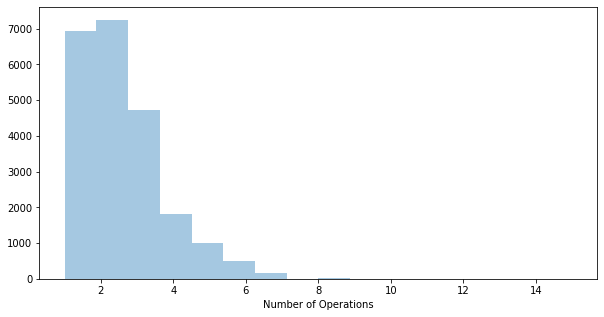

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(edadata.groupby('INVID#').count()['SDOPER'], bins=16, kde=False)
plt.xlabel("Number of Operations")

## 2.2.1 Yield by Operation
- Two most popular operations are Rolling (CR) and Annealing (AN)
- Most operations have yield > 0.8
- Yields of HT, SW and WP are lower than other operations

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Operation')

Text(0, 0.5, 'Yield')

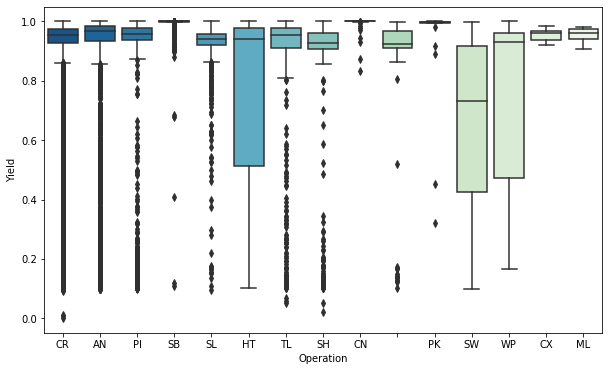

In [23]:
# Yield by Operations
plt.figure(figsize=(10, 6))
sns.boxplot(x='SDOPCD',
            y='YIELD_per_step',
            data=edadata[edadata.YIELD_per_step > 0.0],
            order=edadata.SDOPCD.value_counts().index[:],
            palette='GnBu_r')
plt.xlabel("Operation")
plt.ylabel("Yield")

## 2.2.2 Rolling
- Coils lose 2% - 7% of weights when going through rolling machines
- Machine 41 is the most efficient
- Machine 40 is the least efficient

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, 'Rolling Machine')

Text(0, 0.5, 'Yield')

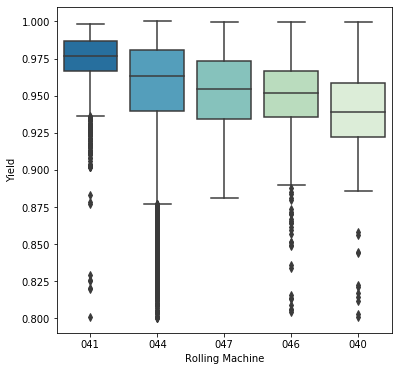

In [25]:
# Yield by Rolling Machine
plt.figure(figsize=(6, 6))
sns.boxplot(x='INSNXU',
            y='YIELD_per_step',
            data=edadata[(edadata.YIELD_per_step > 0.8) & (edadata.SDOPCD == 'CR')],
            order=['041', '044', '047', '046', '040'],
            palette='GnBu_r')
plt.xlabel("Rolling Machine")
plt.ylabel("Yield")

## 2.2.3 Annealing
- Coils lose 1% - 6% of weights when going through annealing operations.
- Machine 147 is the most efficient
- Machine 133 is the least efficient

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, 'Annealing Machine')

Text(0, 0.5, 'Yield')

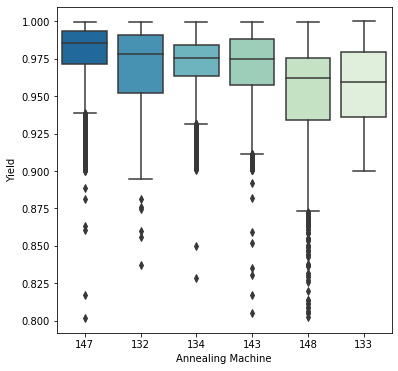

In [27]:
# Yield by Operations
plt.figure(figsize=(6, 6))
sns.boxplot(x='INSNXU',
            y='YIELD_per_step',
            data=edadata[(edadata.YIELD_per_step > 0.8) & (edadata.SDOPCD == 'AN')],
            order=['147', '132', '134', '143', '148', '133'],
            palette='GnBu_r')
plt.xlabel("Annealing Machine")
plt.ylabel("Yield")

## 2.3 Status Code
- Yield is typically lower than average of 0.88 when status code is birth, hold, scrap and check7.

<Figure size 1440x360 with 0 Axes>

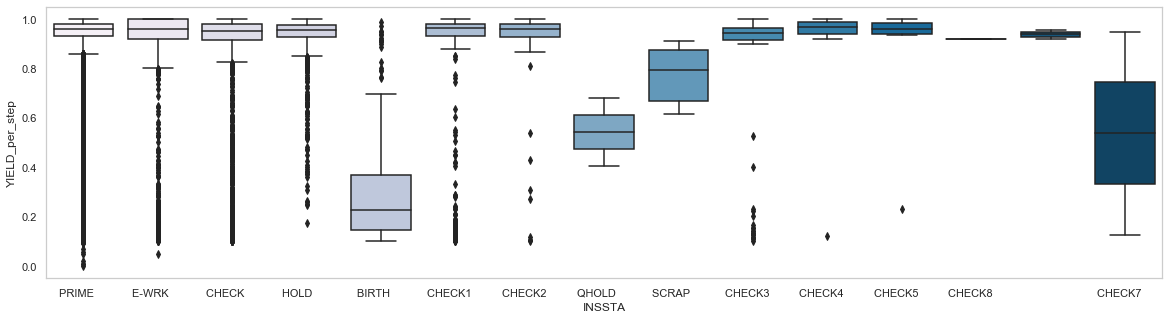

In [30]:
# Birth, hold, scrap, check 7 generate the lowest yield. 
plt.figure(figsize=(20,5))
sns.set(font_scale=1)
sns.set_style('whitegrid', {'axes.grid' : False})
sns.boxplot(x='INSSTA',y='YIELD_per_step',data=edadata,palette='PuBu')

- If we look at obs that have yield lower than 0.88, then yield is typically low at prime, check, birth, extra work.

<Figure size 1440x360 with 0 Axes>

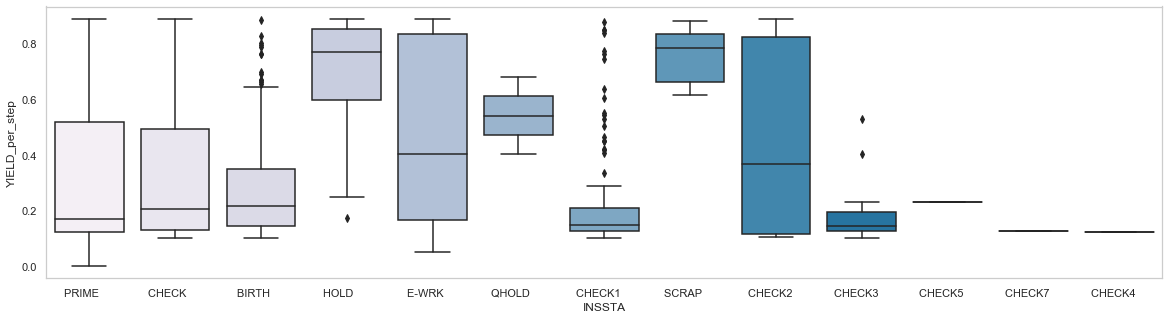

In [31]:
mean_yield=np.mean(edadata['YIELD_per_step'])
low_yield=edadata[edadata['YIELD_per_step']<mean_yield]

plt.figure(figsize=(20,5))
sns.set(font_scale=1)
sns.set_style('whitegrid', {'axes.grid' : False})
sns.boxplot(x='INSSTA',y='YIELD_per_step',data=low_yield,palette='PuBu')

## 2.4 Start Gauge and Start Weight

- Highest yield is generated at start width between 30 - 40, start gauge between 0.4 - 0.6.
- Lowest yield is generated at start gauge between 0 - 0.2, indicating at the final stage of production, gauge becomes low and yield tends to be low.

In [32]:
# create a level for gauge and width
def gauge_level(row):
    if 0 <= row['INSGAG'] < 0.2:
        val = 1
    elif 0.2 <= row['INSGAG'] < 0.4:
        val = 2
    elif 0.4 <= row['INSGAG'] < 0.6:
        val = 3
    elif 0.6 <= row['INSGAG'] < 0.8:
        val = 4
    elif 0.8 <= row['INSGAG'] < 1:
        val = 5
    return val

def width_level(row):
    if 0 <= row['INSWID'] < 10:
        res = 1
    elif 10 <= row['INSWID'] < 20:
        res = 2
    elif 20 <= row['INSWID'] < 30:
        res = 3
    elif 30 <= row['INSWID'] < 40:
        res = 4
    elif 40 <= row['INSWID'] < 60:
        res = 5
    
    return res

In [34]:
# Apply the function into the dataframe
edadata['GAG_LEVEL'] = edadata.apply(gauge_level, axis=1)
edadata['WID_LEVEL'] = edadata.apply(width_level, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# Create a new dataframe to show how average yield performs under each level of gauge and width 
gagWid =edadata.groupby(by=['GAG_LEVEL','WID_LEVEL']).mean()['YIELD_per_step'].unstack()
gagWid

WID_LEVEL,1,2,3,4,5
GAG_LEVEL,,,,,
1,0.747169,0.852533,0.868994,0.879062,0.886649
2,NaN,NaN,0.925158,0.958322,0.952838
3,NaN,NaN,0.960809,0.967781,0.952549
4,NaN,NaN,0.913053,0.921464,0.833676


<Figure size 864x432 with 0 Axes>

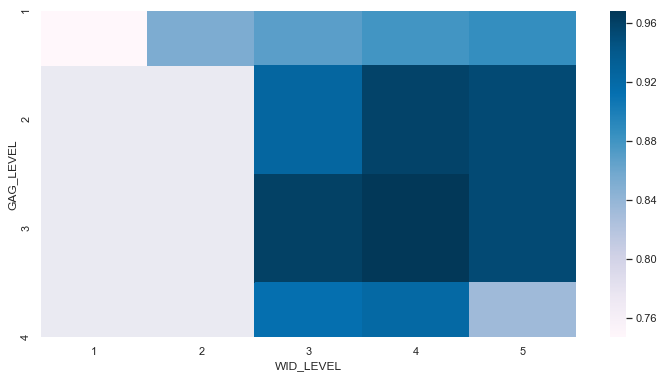

In [37]:
# Create a heatmap
# Highest yield at GAG level of 3 and WID level of 4 
# Lowest yield at GAG level of 1 and WID level of 1 
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.heatmap(gagWid,cmap='PuBu')

# Part 3. Feature Engineering

## 3.1 Calculate Yield per Coil

In [38]:
# Create id_len, parent_id and child_id
merge['id_len'] = merge['INVID#'].apply(len)
merge['parent_id'] = merge['INVID#'].apply(lambda string: int(string[:6]))
merge['child_id'] = merge['INVID#'].apply(lambda string: string[6:])

In [39]:
# Calculate total_slits and total_rows
agg_feats = merge.groupby('parent_id').agg({'id_len': 'max', 'INVID#': 'count'}).reset_index()
agg_feats.columns = ['parent_id', 'total_slits', 'total_rows']
agg_feats.total_slits = agg_feats.total_slits - 6
agg_feats.head()

,parent_id,total_slits,total_rows
0,420000,0,12
1,420001,0,7
2,420002,1,14
3,420003,0,8
4,420004,1,12


In [40]:
# How many times are coils slitted?
agg_feats.total_slits.value_counts()

0    11842
1     3936
2     2085
3      977
4      160
5        9
Name: total_slits, dtype: int64

In [41]:
# Merge with main data
merge = pd.merge(merge, agg_feats, on='parent_id')

In [42]:
merge.head()
merge.shape

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step,id_len,parent_id,child_id,total_slits,total_rows
0,420000,20674,20485,63,226,13599.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.67,0.250,20190611,74046,3979,13599,40,AN,143,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,84425,3979,0.8833,13599.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,64797.0,64797.0,1.38,1.38,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0205,CR,0.0350,0.990858,6,420000,,0,12
1,420000,20485,20485,688,226,13599.0,40,AN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,84425,3979,13599,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,201302,3979,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000,6,420000,,0,12
2,420000,20485,20485,0,226,13599.0,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,201302,3979,13599,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,214242,3985,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000,6,420000,,0,12
3,420000,20485,20485,0,226,13599.0,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,214242,3985,13599,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190612,174243,3985,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,1.000000,6,420000,,0,12
4,420000,20485,18913,0,226,13599.0,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190612,174243,3985,13599,60,AN,134,Y,A,PRIME,NONE,0.0,38.67,0.0163,20190612,180729,7888,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,0.923261,6,420000,,0,12


(223677, 59)

### 3.1.1 with 0 Slit

In [43]:
slit0 = merge[merge.total_slits == 0]
slit0.shape

(100828, 59)

In [44]:
# One example
slit0[slit0.parent_id == 420000].head(5)

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step,id_len,parent_id,child_id,total_slits,total_rows
0,420000,20674,20485,63,226,13599.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.67,0.250,20190611,74046,3979,13599,40,AN,143,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,84425,3979,0.8833,13599.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,64797.0,64797.0,1.38,1.38,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0205,CR,0.0350,0.990858,6,420000,,0,12
1,420000,20485,20485,688,226,13599.0,40,AN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,84425,3979,13599,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,201302,3979,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000,6,420000,,0,12
2,420000,20485,20485,0,226,13599.0,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,201302,3979,13599,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,214242,3985,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000,6,420000,,0,12
3,420000,20485,20485,0,226,13599.0,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,214242,3985,13599,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190612,174243,3985,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,1.000000,6,420000,,0,12
4,420000,20485,18913,0,226,13599.0,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190612,174243,3985,13599,60,AN,134,Y,A,PRIME,NONE,0.0,38.67,0.0163,20190612,180729,7888,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,0.923261,6,420000,,0,12


In [45]:
slit0_yield = slit0.groupby('parent_id').agg({'INSGWT': 'max', 'INFGWT': 'min'}).reset_index()
slit0_yield.columns = ['parent_id', 'start_weight', 'finish_weight']
slit0_yield.head(3)

,parent_id,start_weight,finish_weight
0,420000,20674,18594
1,420001,19938,16333
2,420003,19664,18441


In [46]:
# Calculate yield
slit0_yield['yield'] = slit0_yield.finish_weight / slit0_yield.start_weight

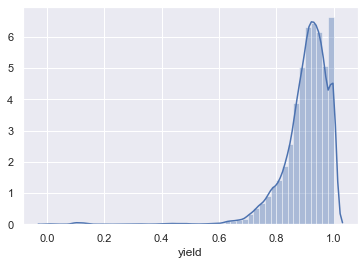

In [47]:
# Distribution plot of yield
sns.distplot(slit0_yield['yield'])

In [48]:
# Remove outliers
slit0_yield = slit0_yield[(slit0_yield['yield'] < 1.00) & (slit0_yield['yield'] > 0.6)]

In [49]:
# We have 10813 coils left.
slit0_yield.head(5)
slit0_yield.shape

,parent_id,start_weight,finish_weight,yield
0,420000,20674,18594,0.899391
1,420001,19938,16333,0.819189
2,420003,19664,18441,0.937805
3,420005,21788,20125,0.923674
4,420006,22063,21682,0.982731


(10813, 4)

6861

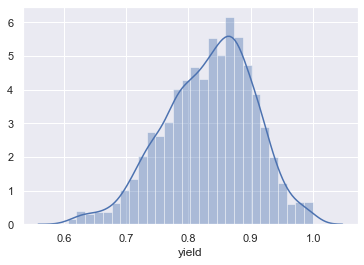

In [50]:
# There are still many coils with yield close to 1.00. We can remove them
# by only selecting parent coil with more row counts (eg. > 10)
more_than_10_rows = agg_feats.parent_id[agg_feats.total_rows > 10].to_list()
len(more_than_10_rows)

# The distribution looks more Gaussian
sns.distplot(slit0_yield['yield'][slit0_yield.parent_id.apply(lambda idx: idx in more_than_10_rows)])

### 3.1.2 with 1 slit

In [51]:
slit1 = merge[merge.total_slits == 1]
slit1.shape

(58168, 59)

In [52]:
# One example
slit1[slit1.parent_id == 420013].head(5)

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step,id_len,parent_id,child_id,total_slits,total_rows
96,420013,18869,17494,51,210,81288.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.21,0.250,20190611,181942,1728,81288,40,AN,143,Y,A,PRIME,NONE,0.0,38.21,0.0690,20190611,191114,1728,0.8819,81288.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,65307.0,65307.0,0.96,0.96,20190531.0,20190628.0,C,38.25,0.0690,25774.3,0.0141,CR,0.0690,0.927129,6,420013,,1,18
97,420013,17494,17494,777,210,81288.0,40,AN,143,Y,A,PRIME,NONE,0.0,38.21,0.069,20190611,191114,1728,81288,40,IN,143,Y,A,PRIME,NONE,0.0,38.21,0.0690,20190612,80839,1728,0.8819,81288.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,65307.0,65307.0,2.69,2.69,20190531.0,20190628.0,C,38.25,0.0690,25774.3,0.0244,AN,0.0100,1.000000,6,420013,,1,18
98,420013,17494,17372,0,210,81288.0,40,IN,143,Y,A,PRIME,NONE,0.0,38.21,0.069,20190612,80839,1728,81288,60,CR,046,Y,A,PRIME,NONE,0.0,38.21,0.0690,20190612,85447,1716,0.8819,81288.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,65307.0,65307.0,2.69,2.69,20190531.0,20190628.0,C,38.25,0.0690,25774.3,0.0244,AN,0.0100,0.993026,6,420013,,1,18
99,420013,17372,17372,0,210,81288.0,60,CR,046,Y,A,PRIME,NONE,0.0,38.21,0.069,20190612,85447,1716,81288,60,IN,046,Y,A,PRIME,NONE,0.0,38.21,0.0690,20190613,180437,1716,0.8406,81288.0,60.0,46.0,46 INTGA ROLL,3.0,3.0,62250.0,62250.0,1.33,1.33,20190614.0,20190628.0,C,38.25,0.0322,52651.6,0.0243,CR,0.0322,1.000000,6,420013,,1,18
100,420013,17372,16399,0,210,81288.0,60,IN,046,Y,A,PRIME,NONE,0.0,38.21,0.069,20190613,180437,1716,81288,70,SL,001,Y,A,PRIME,NONE,0.0,38.21,0.0322,20190613,181319,3471,0.8406,81288.0,60.0,46.0,46 INTGA ROLL,3.0,3.0,62250.0,62250.0,1.33,1.33,20190614.0,20190628.0,C,38.25,0.0322,52651.6,0.0243,CR,0.0322,0.943990,6,420013,,1,18


In [53]:
# Calculate start weight
slit1_sw = slit1.groupby(['parent_id']).agg({'INSGWT': 'max'}).reset_index()
slit1_sw.columns = ['parent_id', 'start_weight']
slit1_sw.head(3)

,parent_id,start_weight
0,420002,20235
1,420004,20002
2,420012,22284


In [54]:
# Calculate finish weight
slit1_fw = slit1[slit1.child_id != ''].groupby(['parent_id', 'child_id']).agg({'INFGWT': 'min'}).reset_index()
slit1_fw = slit1_fw.groupby('parent_id').agg({'INFGWT': 'sum'}).reset_index()
slit1_fw.columns = ['parent_id', 'finish_weight']
slit1_fw.head(3)

,parent_id,finish_weight
0,420002,17634
1,420004,27504
2,420012,2109


In [55]:
# Merge and calculate yield
slit1_yield = pd.merge(slit1_sw, slit1_fw, on='parent_id')
slit1_yield['yield'] = slit1_yield.finish_weight / slit1_yield.start_weight
slit1_yield.shape
slit1_yield.head(3)

(3936, 4)

,parent_id,start_weight,finish_weight,yield
0,420002,20235,17634,0.871460
1,420004,20002,27504,1.375062
2,420012,22284,2109,0.094642


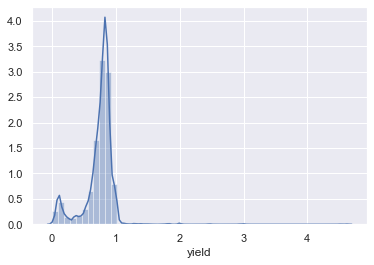

In [56]:
# Distribution plot
sns.distplot(slit1_yield['yield'])

In [57]:
# Remove outliers
slit1_yield = slit1_yield[(slit1_yield['yield'] > 0.4) & (slit1_yield['yield'] < 1)]

(3420, 4)

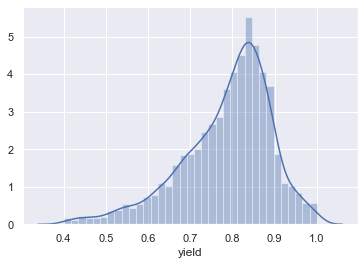

In [58]:
# Distribution plot
slit1_yield.shape
sns.distplot(slit1_yield['yield'])

### 3.1.3 with 2 slit

In [59]:
slit2 = merge[merge.total_slits == 2]
slit2.shape

(39616, 59)

In [60]:
slit2.parent_id.unique()[:5]

array([420016, 420032, 420056, 420059, 420096])

In [61]:
# 1st example
slit2[slit2.parent_id == 420016].head(5)

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step,id_len,parent_id,child_id,total_slits,total_rows
146,420016,20601,18939,40,210,14558.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.43,0.250,20190611,190138,1860,14558,40,AN,143,Y,A,PRIME,NONE,0.0,38.43,0.069,20190611,194208,1860,0.8819,14558.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,55824.0,55824.0,0.82,0.82,20190524.0,20190624.0,C,38.25,0.0690,25774.3,0.0141,CR,0.0690,0.919324,6,420016,,2,21
147,420016,18939,18939,835,210,14558.0,40,AN,143,Y,A,PRIME,NONE,0.0,38.43,0.069,20190611,194208,1860,14558,40,IN,143,Y,A,PRIME,NONE,0.0,38.43,0.069,20190612,93736,1860,0.8819,14558.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,55824.0,55824.0,2.30,2.30,20190524.0,20190624.0,C,38.25,0.0690,25774.3,0.0244,AN,0.0100,1.000000,6,420016,,2,21
148,420016,18939,18856,0,210,14558.0,40,IN,143,Y,A,PRIME,NONE,0.0,38.43,0.069,20190612,93736,1860,14558,60,CR,046,Y,A,HOLD,SLAMS,0.0,38.43,0.069,20190612,102609,1852,0.8819,14558.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,55824.0,55824.0,2.30,2.30,20190524.0,20190624.0,C,38.25,0.0690,25774.3,0.0244,AN,0.0100,0.995618,6,420016,,2,21
149,420016,18856,18856,0,210,14558.0,60,CR,046,Y,A,HOLD,SLAMS,0.0,38.43,0.069,20190612,102609,1852,14558,60,CR,046,Y,A,HOLD,SLAMS,0.0,38.43,0.069,20190612,103724,1852,0.8406,14558.0,60.0,46.0,46 INTGA ROLL,3.0,3.0,53210.0,53210.0,1.14,1.14,20190607.0,20190624.0,C,38.25,0.0322,52651.6,0.0243,CR,0.0322,1.000000,6,420016,,2,21
150,420016,18856,18856,0,210,14558.0,60,CR,046,Y,A,HOLD,SLAMS,0.0,38.43,0.069,20190612,103724,1852,14558,60,CR,046,Y,A,CHECK,SLAMS,0.0,38.43,0.069,20190612,103806,1852,0.8406,14558.0,60.0,46.0,46 INTGA ROLL,3.0,3.0,53210.0,53210.0,1.14,1.14,20190607.0,20190624.0,C,38.25,0.0322,52651.6,0.0243,CR,0.0322,1.000000,6,420016,,2,21


In [63]:
# 2nd examples
slit2[slit2.parent_id == 420032].head(5)

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step,id_len,parent_id,child_id,total_slits,total_rows
304,420032,19459,18479,57,260,5277.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.03,0.2500,20190612,234240,2619,05277,40,AN,143,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190612,4008,2619,0.8827,5277.0,30.0,44.0,44 4-STAND ROLL,1.0,1.0,20972.0,20972.0,0.36,0.36,20190628.0,20190612.0,C,38.25,0.0502,35461.6,0.0165,CR,0.0502,0.949638,6,420032,,2,7
305,420032,18479,18479,2250,260,5277.0,40,AN,143,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190612,4008,2619,05277,40,IN,143,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190613,141053,2619,0.8827,5277.0,40.0,143.0,143 STRAND ANNEAL,1.0,1.0,20972.0,20972.0,1.23,1.23,20190628.0,20190613.0,C,38.25,0.0500,35600.1,0.0348,AN,0.0450,1.000000,6,420032,,2,7
306,420032,18479,8875,0,260,5277.0,40,IN,143,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190613,141053,2619,05277,40,IN,143,Y,B,BIRTH,NONE,0.0,38.03,0.0502,20190613,145716,2619,0.8827,5277.0,40.0,143.0,143 STRAND ANNEAL,1.0,1.0,20972.0,20972.0,1.23,1.23,20190628.0,20190613.0,C,38.25,0.0500,35600.1,0.0348,AN,0.0450,0.480275,6,420032,,2,7
307,420032A,9604,9604,6953,260,5277.0,50,SL,073,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190613,145714,1361,05277,50,IN,073,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190618,105055,0,0.7249,5277.0,50.0,73.0,73 SLITTER,1.0,1.0,17222.0,17222.0,2.36,2.36,20190628.0,20190618.0,C,36.00,0.0500,96.0,0.1058,SL,0.0500,1.000000,7,420032,A,2,7
308,420032B,8277,8277,5750,260,5277.0,50,SL,073,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190613,151146,1173,05277,50,IN,073,Y,A,PRIME,NONE,0.0,38.03,0.0502,20190617,150231,0,0.7249,5277.0,50.0,73.0,73 SLITTER,1.0,1.0,17222.0,17222.0,2.36,2.36,20190628.0,20190618.0,C,36.00,0.0500,96.0,0.1058,SL,0.0500,1.000000,7,420032,B,2,7


In [62]:
# There are problems with 2 slits, as in two examples above. So for feature enginnering we will work on 0 and 1 slits first.

### Merge yield data by combining 0 slit and 1 slit data

In [64]:
# Merge 0_slit and 1_slit
yield_data = pd.concat([slit0_yield, slit1_yield], axis=0)
yield_data.sort_values(by='parent_id', ascending=True, inplace=True)
yield_data.shape
yield_data.head(3)

(14233, 4)

,parent_id,start_weight,finish_weight,yield
0,420000,20674,18594,0.899391
1,420001,19938,16333,0.819189
0,420002,20235,17634,0.871460


In [65]:
# Save
yield_data.to_csv("yield_data.csv", index=False)

### Merge yield and original data together

In [97]:
rawdf = pd.read_csv('merge.csv')
rawdf.head()

,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step
0,420000,20674,20485,63,226,13599.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.67,0.250,20190611,74046,3979,13599,40,AN,143,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,84425,3979,0.8833,13599.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,64797.0,64797.0,1.38,1.38,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0205,CR,0.0350,0.990858
1,420000,20485,20485,688,226,13599.0,40,AN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,84425,3979,13599,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,201302,3979,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000
2,420000,20485,20485,0,226,13599.0,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,201302,3979,13599,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,214242,3985,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000
3,420000,20485,20485,0,226,13599.0,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,214242,3985,13599,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190612,174243,3985,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,1.000000
4,420000,20485,18913,0,226,13599.0,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190612,174243,3985,13599,60,AN,134,Y,A,PRIME,NONE,0.0,38.67,0.0163,20190612,180729,7888,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,0.923261


In [98]:
# Add a coil_number column to merge with yield data
# define a function to generate coil_numb column
def coil_numb(row):
    val = int(row['INVID#'][:6])
    return val

# apply the function to all rows
rawdf['coil_numb'] = rawdf.apply(coil_numb, axis=1)

In [99]:
# Merge rawdf with yield data
df=pd.merge(yield_data, rawdf, how='inner', left_on = 'parent_id', right_on = 'coil_numb')
df.head()

,parent_id,start_weight,finish_weight,yield,INVID#,INSGWT,INFGWT,INELAP,INALLY,INSENT,INSRSQ,INSNXO,INSNXU,INSROP,INSACT,INSSTA,INSHLD,INSLEN,INSWID,INSGAG,INSDAT,INSTIM,INSFOT,INFENT,INFRSQ,INFNXO,INFNXU,INFROP,INFACT,INFSTA,INFHLD,INFLEN,INFWID,INFGAG,INFDAT,INFTIM,INFFOT,SDYELD,SDENT#,SDOPER,SDNUMB,SDDESC,SDPCS,SDPCSC,SDLBS,SDLBSC,SDHRS,SDHRSC,SDDTE,SDDTEA,SDSTAT,SDWDT,SDGAG,SDLEN,SDHRSM,SDOPCD,SDRTAR,YIELD_per_step,coil_numb
0,420000,20674,18594,0.899391,420000,20674,20485,63,226,13599.0,30,IN,044,Y,A,PRIME,NONE,0.0,38.67,0.250,20190611,74046,3979,13599,40,AN,143,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,84425,3979,0.8833,13599.0,30.0,44.0,44 4-STAND ROLL,3.0,3.0,64797.0,64797.0,1.38,1.38,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0205,CR,0.0350,0.990858,420000
1,420000,20674,18594,0.899391,420000,20485,20485,688,226,13599.0,40,AN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,84425,3979,13599,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,201302,3979,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000,420000
2,420000,20674,18594,0.899391,420000,20485,20485,0,226,13599.0,40,IN,147,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,201302,3979,13599,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190611,214242,3985,0.8833,13599.0,40.0,143.0,143 STRAND ANNEAL,3.0,3.0,64797.0,64797.0,4.88,4.88,20190531.0,20190611.0,C,38.25,0.0350,50893.0,0.0446,AN,0.0600,1.000000,420000
3,420000,20674,18594,0.899391,420000,20485,20485,0,226,13599.0,50,CR,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190611,214242,3985,13599,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.0350,20190612,174243,3985,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,1.000000,420000
4,420000,20674,18594,0.899391,420000,20485,18913,0,226,13599.0,50,IN,046,Y,A,PRIME,NONE,0.0,38.67,0.035,20190612,174243,3985,13599,60,AN,134,Y,A,PRIME,NONE,0.0,38.67,0.0163,20190612,180729,7888,0.8419,13599.0,50.0,46.0,46 INTGA ROLL,3.0,3.0,61764.0,61764.0,2.33,2.33,20190531.0,20190612.0,C,38.25,0.0162,104826.9,0.0428,CR,0.0162,0.923261,420000


## 3.2 Store expected feature at coil-level

### 3.2.1. Get SDNUMB and SDOPCD dummies

In [100]:
oper_dummies = pd.get_dummies(merge[['parent_id', 'SDOPCD', 'SDNUMB','INALLY']],
                            columns=['SDOPCD', 'SDNUMB','INALLY']).groupby('parent_id').max().reset_index()
oper_dummies.drop(['SDOPCD_  '], axis=1, inplace=True)
oper_dummies.head()

,parent_id,SDOPCD_AN,SDOPCD_CN,SDOPCD_CR,SDOPCD_CX,SDOPCD_HR,SDOPCD_HT,SDOPCD_ML,SDOPCD_PI,SDOPCD_PK,SDOPCD_SB,SDOPCD_SH,SDOPCD_SL,SDOPCD_SW,SDOPCD_TL,SDOPCD_WP,SDNUMB_1.0,SDNUMB_3.0,SDNUMB_19.0,SDNUMB_22.0,SDNUMB_23.0,SDNUMB_24.0,SDNUMB_25.0,SDNUMB_27.0,SDNUMB_28.0,SDNUMB_29.0,SDNUMB_31.0,SDNUMB_34.0,SDNUMB_36.0,SDNUMB_40.0,SDNUMB_41.0,SDNUMB_43.0,SDNUMB_44.0,SDNUMB_46.0,SDNUMB_47.0,SDNUMB_55.0,SDNUMB_65.0,SDNUMB_68.0,SDNUMB_73.0,SDNUMB_74.0,SDNUMB_76.0,SDNUMB_77.0,SDNUMB_78.0,SDNUMB_94.0,SDNUMB_100.0,SDNUMB_132.0,SDNUMB_133.0,SDNUMB_134.0,SDNUMB_143.0,SDNUMB_147.0,SDNUMB_148.0,SDNUMB_230.0,SDNUMB_268.0,SDNUMB_612.0,SDNUMB_613.0,INALLY_102,INALLY_103,INALLY_1092,INALLY_110,INALLY_1102,INALLY_1103,INALLY_120,INALLY_122,INALLY_1225,INALLY_1257,INALLY_1441,INALLY_1453,INALLY_1921,INALLY_194,INALLY_197,INALLY_210,INALLY_220,INALLY_2205,INALLY_226,INALLY_230,INALLY_240,INALLY_260,INALLY_2600,INALLY_2601,INALLY_2604,INALLY_2605,INALLY_2608,INALLY_268,INALLY_272,INALLY_280,INALLY_411,INALLY_422,INALLY_425,INALLY_5072,INALLY_510,INALLY_511,INALLY_6476,INALLY_7025,INALLY_7026,INALLY_7036,INALLY_7151,INALLY_CAC5,INALLY_KLF5,INALLY_TST0,INALLY_TST1,INALLY_UNIL
0,420000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,420001,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,420002,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420003,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,420004,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2.2 Get count of each dummy

In [101]:
oper_counts = pd.get_dummies(merge[['parent_id', 'SDOPCD', 'SDNUMB','INALLY']][merge.INSNXO == 'IN'],
                            columns=['SDOPCD', 'SDNUMB','INALLY']).groupby('parent_id').sum().reset_index()
oper_counts.drop(['SDOPCD_  '], axis=1, inplace=True)
oper_counts.head()

,parent_id,SDOPCD_AN,SDOPCD_CN,SDOPCD_CR,SDOPCD_CX,SDOPCD_HT,SDOPCD_ML,SDOPCD_PI,SDOPCD_PK,SDOPCD_SB,SDOPCD_SH,SDOPCD_SL,SDOPCD_SW,SDOPCD_TL,SDOPCD_WP,SDNUMB_1.0,SDNUMB_19.0,SDNUMB_22.0,SDNUMB_23.0,SDNUMB_24.0,SDNUMB_25.0,SDNUMB_27.0,SDNUMB_28.0,SDNUMB_29.0,SDNUMB_31.0,SDNUMB_34.0,SDNUMB_36.0,SDNUMB_40.0,SDNUMB_41.0,SDNUMB_44.0,SDNUMB_46.0,SDNUMB_47.0,SDNUMB_55.0,SDNUMB_65.0,SDNUMB_68.0,SDNUMB_73.0,SDNUMB_74.0,SDNUMB_76.0,SDNUMB_77.0,SDNUMB_78.0,SDNUMB_94.0,SDNUMB_100.0,SDNUMB_132.0,SDNUMB_133.0,SDNUMB_134.0,SDNUMB_143.0,SDNUMB_147.0,SDNUMB_148.0,SDNUMB_230.0,SDNUMB_612.0,SDNUMB_613.0,INALLY_102,INALLY_103,INALLY_1092,INALLY_110,INALLY_1102,INALLY_1103,INALLY_120,INALLY_122,INALLY_1225,INALLY_1257,INALLY_1441,INALLY_1453,INALLY_1921,INALLY_197,INALLY_210,INALLY_220,INALLY_2205,INALLY_226,INALLY_230,INALLY_240,INALLY_260,INALLY_2600,INALLY_2601,INALLY_2604,INALLY_2605,INALLY_2608,INALLY_268,INALLY_272,INALLY_280,INALLY_411,INALLY_422,INALLY_425,INALLY_5072,INALLY_510,INALLY_511,INALLY_6476,INALLY_7025,INALLY_7026,INALLY_7036,INALLY_7151,INALLY_CAC5,INALLY_KLF5,INALLY_TST0,INALLY_UNIL
0,420000,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,420001,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,420002,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,420003,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,420004,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2.3 Width and Gauge

In [102]:
first_feats = merge[['parent_id', 'SDGAG', 'SDWDT', 'SDLEN', 'INSLEN','INSGAG', 'INSWID','SDHRS']].\
groupby('parent_id').first().reset_index()

### 3.2.4 Final Data for Training

In [104]:
df = pd.merge(oper_counts, first_feats, on='parent_id')
df = pd.merge(df, yield_data[['parent_id', 'yield']], on='parent_id')
df = pd.merge(df, agg_feats, on='parent_id') # number of slits
df.drop(['total_rows'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()
df.shape

,parent_id,SDOPCD_AN,SDOPCD_CN,SDOPCD_CR,SDOPCD_CX,SDOPCD_HT,SDOPCD_ML,SDOPCD_PI,SDOPCD_PK,SDOPCD_SB,SDOPCD_SH,SDOPCD_SL,SDOPCD_SW,SDOPCD_TL,SDOPCD_WP,SDNUMB_1.0,SDNUMB_19.0,SDNUMB_22.0,SDNUMB_23.0,SDNUMB_24.0,SDNUMB_25.0,SDNUMB_27.0,SDNUMB_28.0,SDNUMB_29.0,SDNUMB_31.0,SDNUMB_34.0,SDNUMB_36.0,SDNUMB_40.0,SDNUMB_41.0,SDNUMB_44.0,SDNUMB_46.0,SDNUMB_47.0,SDNUMB_55.0,SDNUMB_65.0,SDNUMB_68.0,SDNUMB_73.0,SDNUMB_74.0,SDNUMB_76.0,SDNUMB_77.0,SDNUMB_78.0,SDNUMB_94.0,SDNUMB_100.0,SDNUMB_132.0,SDNUMB_133.0,SDNUMB_134.0,SDNUMB_143.0,SDNUMB_147.0,SDNUMB_148.0,SDNUMB_230.0,SDNUMB_612.0,SDNUMB_613.0,INALLY_102,INALLY_103,INALLY_1092,INALLY_110,INALLY_1102,INALLY_1103,INALLY_120,INALLY_122,INALLY_1225,INALLY_1257,INALLY_1441,INALLY_1453,INALLY_1921,INALLY_197,INALLY_210,INALLY_220,INALLY_2205,INALLY_226,INALLY_230,INALLY_240,INALLY_260,INALLY_2600,INALLY_2601,INALLY_2604,INALLY_2605,INALLY_2608,INALLY_268,INALLY_272,INALLY_280,INALLY_411,INALLY_422,INALLY_425,INALLY_5072,INALLY_510,INALLY_511,INALLY_6476,INALLY_7025,INALLY_7026,INALLY_7036,INALLY_7151,INALLY_CAC5,INALLY_KLF5,INALLY_TST0,INALLY_UNIL,SDGAG,SDWDT,SDLEN,INSLEN,INSGAG,INSWID,SDHRS,yield,total_slits
0,420000,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.035,38.25,50893.0,0.0,0.250,38.67,1.38,0.899391,0
1,420001,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.035,38.25,50893.0,0.0,0.035,38.01,4.88,0.819189,0
2,420002,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.035,38.25,50893.0,0.0,0.250,38.15,1.38,0.871460,1
3,420003,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.045,38.25,39569.3,0.0,0.250,38.25,0.37,0.937805,0
4,420005,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050,38.25,35601.8,0.0,0.250,38.75,0.37,0.923674,0


(14204, 104)

In [105]:
# save
df.to_csv('modeldf.csv', index = False)

# Part 4. Machine Learning

In [106]:
data = pd.read_csv('modeldf.csv')

In [107]:
# train test split
from sklearn.model_selection import train_test_split
X=data.drop(['yield','parent_id'],axis=1)
y=data['yield']*100
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [108]:
# Normalize input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4.1 Ridge Regression

In [109]:
# use grid search cv to tune the model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
params = {'alpha': [0.01,0.1,0.5], 'max_iter':[300,500,1000]}
grid_search = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
grid_predictions = grid_search.predict(X_test)

print('MAE:', mean_absolute_error(y_test,grid_predictions))
grid_search.best_estimator_ # max_iter = 300, alpha = 0.5

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.5],
                         'max_iter': [300, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

MAE: 4.010811091405548


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=300, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [110]:
# ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5,max_iter=300)
ridge.fit(X_train, y_train)

# prediction
predictions = ridge.predict(X_test)
pd.Series(ridge.coef_, index=X.columns).sort_values()

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=300, normalize=False,
      random_state=None, solver='auto', tol=0.001)

total_slits    -3.762183
SDNUMB_46.0    -3.318535
SDOPCD_PI      -2.902987
SDNUMB_44.0    -2.332695
SDNUMB_47.0    -2.045505
                  ...   
INSWID          0.601244
INALLY_1453     0.955475
SDNUMB_27.0     1.199508
SDOPCD_CR       1.772757
SDNUMB_36.0     2.398547
Length: 102, dtype: float64

In [156]:
pd.Series(ridge.coef_, index=X.columns).sort_values(ascending = False)[0:20]

SDNUMB_36.0     2.398547
SDOPCD_CR       1.772757
SDNUMB_27.0     1.199508
INALLY_1453     0.955475
INSWID          0.601244
SDNUMB_133.0    0.571184
SDNUMB_612.0    0.529781
INALLY_122      0.524637
SDNUMB_613.0    0.455798
SDOPCD_TL       0.437821
SDNUMB_143.0    0.431415
INALLY_260      0.405652
SDNUMB_24.0     0.391082
INSGAG          0.330303
INALLY_210      0.298501
SDNUMB_132.0    0.294163
INALLY_226      0.288174
INALLY_220      0.263735
INALLY_2608     0.262078
SDOPCD_SL       0.235753
dtype: float64

<Figure size 8640x360 with 0 Axes>

<BarContainer object of 102 artists>

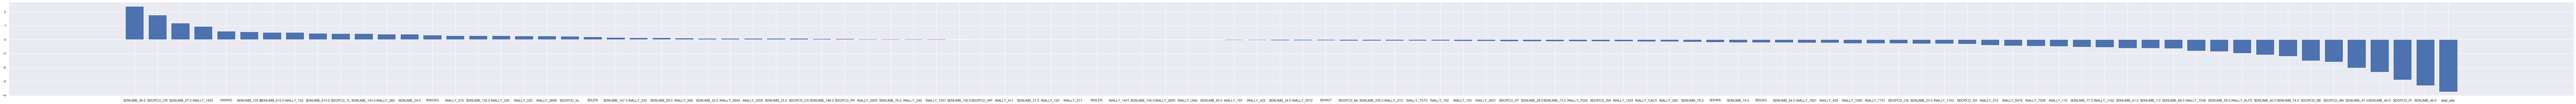

In [111]:
# plot feature importances
ridge_df = pd.DataFrame(pd.Series(ridge.coef_, index=X.columns).sort_values(ascending = False))
plt.figure(figsize=(120,5))
plt.bar(ridge_df.index, ridge_df[0])
plt.tight_layout() # double click the graph to zoom in

## 4.2 Lasso Regression

In [112]:
# grid search cv
from sklearn import linear_model

lasso = linear_model.Lasso()
params = {'alpha': [0.01,0.1,0.5], 'max_iter':[300,500,1000]}
grid_search = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
grid_predictions = grid_search.predict(X_test)

print('MAE:', mean_absolute_error(y_test,grid_predictions))
grid_search.best_estimator_ # max_iter = 300, alpha = 0.01

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242.78785107063595, tolerance: 67.06048295923819
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.79613317432813, tolerance: 66.28975458738955
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.27190253374283, tolerance: 67.06048295923819
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.5],
                         'max_iter': [300, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

MAE: 4.006910884282641


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=300,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [147]:
lasso = linear_model.Lasso(alpha=0.01,max_iter=1000)
lasso.fit(X_train, y_train)

# prediction
predictions = lasso.predict(X_test)
pd.Series(lasso.coef_, index=X.columns).sort_values()

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

total_slits    -3.765655
SDNUMB_46.0    -1.174275
SDOPCD_CR      -1.126781
SDOPCD_AN      -1.011517
SDNUMB_44.0    -0.848765
                  ...   
INALLY_210      0.265575
SDNUMB_133.0    0.317871
INALLY_122      0.474193
INSWID          0.527348
INALLY_1453     0.820161
Length: 102, dtype: float64

<Figure size 8640x360 with 0 Axes>

<BarContainer object of 102 artists>

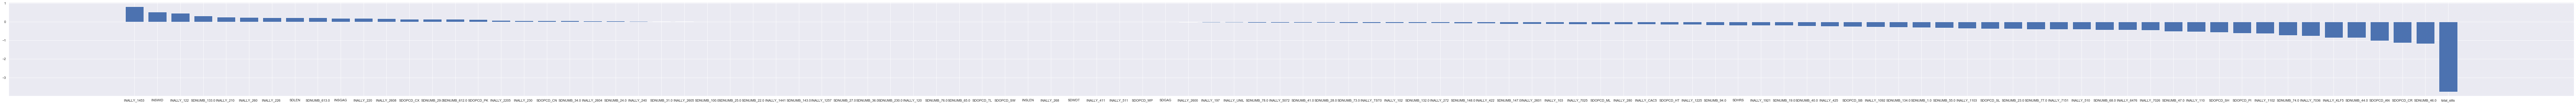

In [114]:
# plot feature importances
lasso_df = pd.DataFrame(pd.Series(lasso.coef_, index=X.columns).sort_values(ascending = False))
plt.figure(figsize=(120,5))
plt.bar(lasso_df.index, lasso_df[0])
plt.tight_layout() # double click the graph to zoom in

## 4.3 Light GBM

In [115]:
# grid search cv
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
params = {'n_estimators': [730,740,750], 'learning_rate':[0.05,0.1,0.5],'max_depth':[5,10,20],'min_child_samples':[20,30,40]}
grid_search = GridSearchCV(lgb, params, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
grid_predictions = grid_search.predict(X_test)

print('MAE:', mean_absolute_error(y_test,grid_predictions))
grid_search.best_estimator_ # best estimator is n_estimator of 750, learning rate of 0.1, max depth of 10, min child sample is 20

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [5, 10, 20],
                         'min_child_samples': [20, 30, 40],

MAE: 3.776883849454887


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=5,
              min_child_samples=30, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=730, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [118]:
lgb = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=5,
              min_child_samples=30, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=730, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [119]:
lgb.fit(X_train, y_train)
predictions = lgb.predict(X_test)

print('MAE:', mean_absolute_error(y_test,predictions))
lgb.feature_importances_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=5,
              min_child_samples=30, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=730, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

MAE: 3.776883849454887


array([ 274,    3,  420,    0,  101,    0,   80,    0,   87,   67,  139,
          0,   51,    0,   20,    0,    0,    0,   28,    0,   48,    0,
          0,    0,    0,    3,   58,    8,   91,  105,   88,   27,    0,
         30,    0,   38,    0,   84,    0,    0,    0,   66,   41,  136,
        113,   74,    7,    0,   15,   35,    0,    0,    0,   72,  108,
         68,   10,   75,    7,   89,    0,  261,   25,    0,   40,   30,
          0,   30,    6,    0,  192,    0,    0,    3,   44,   56,   16,
          0,    0,    0,   28,    0,    0,   22,    0,    2,    0,    9,
         75,    0,    0,   54,    0,   53,  647,  315,  822,    0,  558,
       1750, 1072,  401], dtype=int32)

<Figure size 7920x360 with 0 Axes>

<BarContainer object of 102 artists>

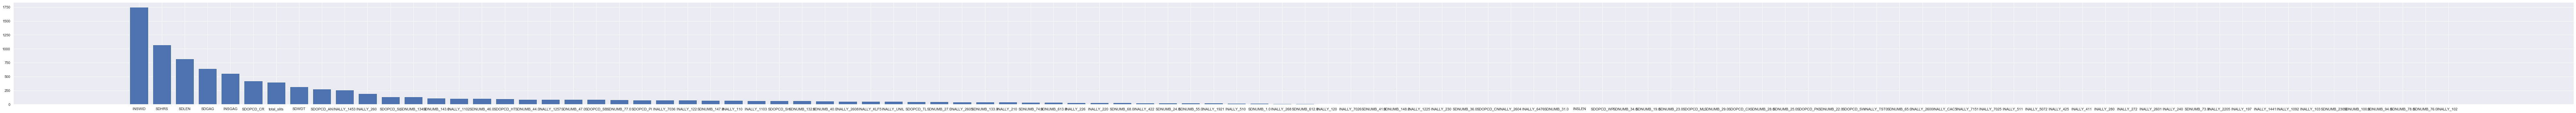

In [120]:
# Plot feature importance 
lgb_feat = pd.DataFrame(list(zip(lgb.feature_importances_)),X.columns)
lgb_feat = pd.DataFrame(pd.Series(lgb_feat[0]).sort_values(ascending = False))
plt.figure(figsize=(110,5))
plt.bar(lgb_feat.index, lgb_feat[0])
plt.tight_layout() # double click the graph to zoom in

In [152]:
# Top 15 features
pd.Series(lgb_feat[0]).sort_values(ascending = False)[0:16]

INSWID          1750
SDHRS           1072
SDLEN            822
SDGAG            647
INSGAG           558
SDOPCD_CR        420
total_slits      401
SDWDT            315
SDOPCD_AN        274
INALLY_1453      261
INALLY_260       192
SDOPCD_SL        139
SDNUMB_134.0     136
SDNUMB_143.0     113
INALLY_1102      108
SDNUMB_46.0      105
Name: 0, dtype: int64